In [114]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
# Load the online news dataset
data = pd.read_csv("OnlineNewsPopularity.csv")
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [1]:
# Get the statistics of original target attribute
popularity_raw = data[data.keys()[-1]]
popularity_raw.describe()
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw>=1400))

NameError: name 'data' is not defined

In [116]:
# Get the features from dataset
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)
display(features_raw.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


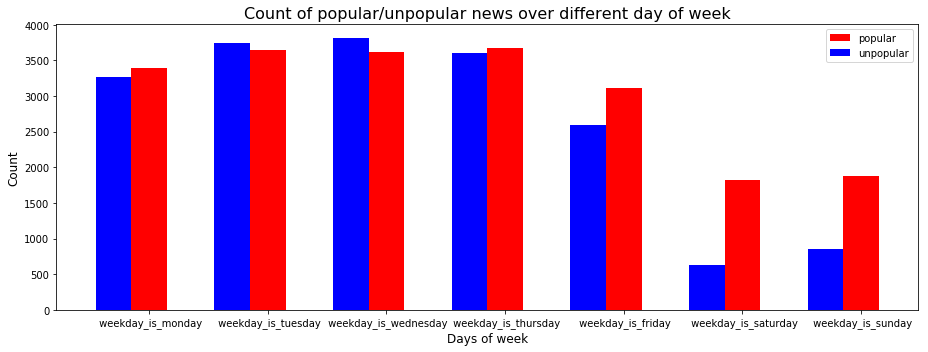

In [118]:
# Visualize the feature of different day of week
columns_day = features_raw.columns.values[29:36]
unpop=data[data[' shares']<1400]
pop=data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()  

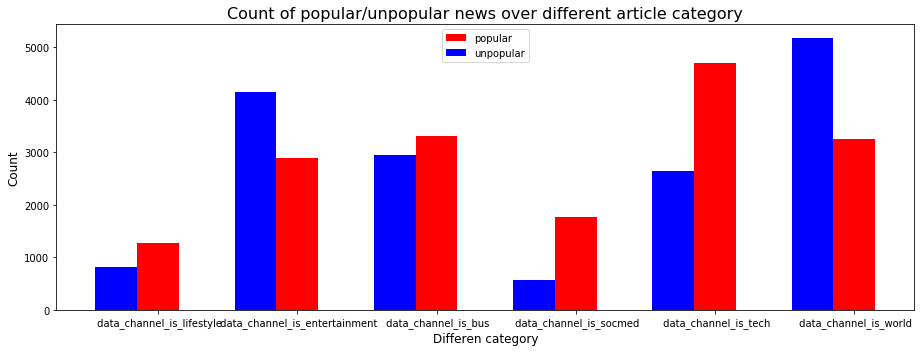

In [201]:
# Visualize the feature of different article category
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()  

In [120]:
# Normalize the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',\
            ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares',\
             ' self_reference_avg_sharess']
features_raw[numerical] = scaler.fit_transform(data[numerical])
display(features_raw.head(n = 1))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.47619,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875


In [1]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2'])
reduced_features_pop = reduced_features[data[' shares']>=1400]
reduced_features_unpop = reduced_features[data[' shares']<1400]

NameError: name 'features_raw' is not defined

In [1]:
fig, ax = pl.subplots(figsize = (10,10))
# Scatterplot of the reduced data    
ax.scatter(x=reduced_features_pop.loc[:, 'Dimension 1'], y=reduced_features_pop.loc[:, 'Dimension 2'],\
           c='b',alpha=0.5)
ax.scatter(x=reduced_features_unpop.loc[:, 'Dimension 1'], y=reduced_features_unpop.loc[:, 'Dimension 2'],\
           c='r', alpha=0.5)
ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PCA on 2 dimensions.", fontsize=16);
pl.savefig("pca2.jpg")

from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3).fit(features_raw)
reduced_features = pca.transform(features_raw)
reduced_features = pd.DataFrame(reduced_features, columns = ['Dimension 1', 'Dimension 2','Dimension 3'])
reduced_features_pop = reduced_features[data[' shares']>=1400]
reduced_features_unpop = reduced_features[data[' shares']<1400]
# 3D scatterplot of the reduced data 
fig = pl.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( reduced_features_pop.loc[:, 'Dimension 2'],reduced_features_pop.loc[:, 'Dimension 1'],\
           reduced_features_pop.loc[:, 'Dimension 3'], c='b',marker='^')
ax.scatter(reduced_features_unpop.loc[:, 'Dimension 2'],reduced_features_unpop.loc[:, 'Dimension 1'],\
           reduced_features_unpop.loc[:, 'Dimension 3'], c='r')
ax.set_xlabel("Dimension 2", fontsize=14)
ax.set_ylabel("Dimension 1", fontsize=14)
ax.set_zlabel("Dimension 3", fontsize=14)
ax.set_title("PCA on 3 dimensions.", fontsize=16);
pl.savefig("pca3.jpg")

NameError: name 'pl' is not defined

In [133]:
# Feature selection by RFECV
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = AdaBoostClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(features_raw, popular_label)
selector.ranking_

estimator_LR = LogisticRegression(random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(features_raw, popular_label)
selector_LR.ranking_

estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(features_raw, popular_label)
selector_RF.ranking_

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

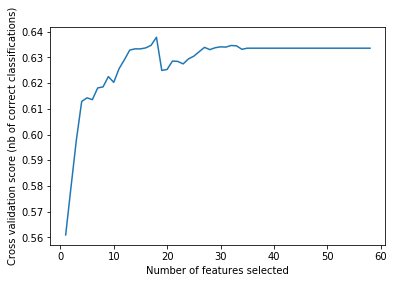

18
[' n_non_stop_unique_tokens' ' num_self_hrefs' ' num_imgs' ' num_videos'
 ' num_keywords' ' data_channel_is_entertainment' ' data_channel_is_socmed'
 ' kw_min_min' ' kw_avg_min' ' kw_min_max' ' kw_max_max' ' kw_min_avg'
 ' kw_max_avg' ' kw_avg_avg' ' self_reference_min_shares'
 ' self_reference_max_shares' ' global_subjectivity'
 ' global_sentiment_polarity']


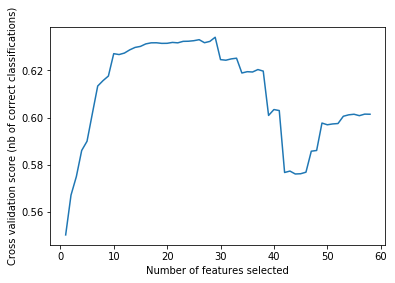

29
[' n_tokens_title' ' n_unique_tokens' ' n_non_stop_words'
 ' average_token_length' ' num_keywords' ' data_channel_is_entertainment'
 ' data_channel_is_socmed' ' data_channel_is_tech' ' data_channel_is_world'
 ' kw_min_min' ' kw_min_avg' ' kw_avg_avg' ' weekday_is_monday'
 ' weekday_is_tuesday' ' weekday_is_wednesday' ' weekday_is_thursday'
 ' weekday_is_saturday' ' weekday_is_sunday' ' is_weekend' ' LDA_00'
 ' LDA_01' ' LDA_02' ' LDA_04' ' rate_negative_words'
 ' avg_positive_polarity' ' avg_negative_polarity' ' min_negative_polarity'
 ' title_sentiment_polarity' ' abs_title_subjectivity']


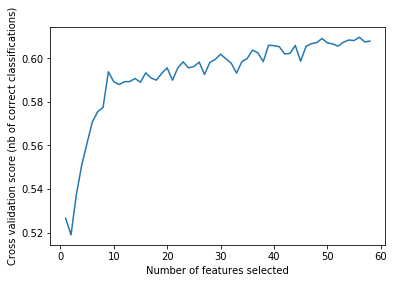

2
[' n_non_stop_words' ' data_channel_is_lifestyle']


In [135]:
# Plot the cv score vs number of features
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
pl.savefig('RFE_ADA.pdf')
pl.show()

print features_raw.columns.values[selector.ranking_==1].shape[0]
print features_raw.columns.values[selector.ranking_==1]
features_ADA = features_raw[features_raw.columns.values[selector.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
pl.savefig('RFE_LR.pdf')
pl.show()

print features_raw.columns.values[selector_LR.ranking_==1].shape[0]
print features_raw.columns.values[selector_LR.ranking_==1]
features_LR = features_raw[features_raw.columns.values[selector_LR.ranking_==1]]

pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_RF.grid_scores_) + 1), selector_RF.grid_scores_)
pl.savefig('RFE_RF.pdf')
pl.show()

print features_raw.columns.values[selector_RF.ranking_!=1].shape[0]
print features_raw.columns.values[selector_RF.ranking_!=1]
features_RF = features_raw[features_raw.columns.values[selector_RF.ranking_==1]]

In [195]:
# Split data into training and testing sets
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.cross_validation import train_test_split


X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, popular_label, test_size = 0.1, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, popular_label, test_size = 0.1, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, popular_label, test_size = 0.1, random_state = 0)

print "Training set has {} samples.".format(X_train_ADA.shape[0])
print "Testing set has {} samples.".format(X_test_ADA.shape[0])

Training set has 35679 samples.
Testing set has 3965 samples.


In [3]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
    print "{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test'])   
    # Return the results
    return results

SyntaxError: invalid syntax (<ipython-input-3-dcdb45875695>, line 48)

In [4]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 4, figsize = (16,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j/4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j/4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Training Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.savefig(name)
    pl.tight_layout()
    pl.show()
    

AdaBoostClassifier trained on 317 samples.
AdaBoostClassifier with accuracy 0.580148820784, F1 0.616871907009 and AUC 0.576562211764.
AdaBoostClassifier trained on 3171 samples.
AdaBoostClassifier with accuracy 0.632488333964, F1 0.669539578136 and AUC 0.62814320575.
AdaBoostClassifier trained on 31715 samples.
AdaBoostClassifier with accuracy 0.649766679279, F1 0.678699525628 and AUC 0.64673709548.
LogisticRegression trained on 317 samples.
LogisticRegression with accuracy 0.624290578888, F1 0.665694085961 and AUC 0.619249528131.
LogisticRegression trained on 3171 samples.
LogisticRegression with accuracy 0.637659225627, F1 0.67429996599 and AUC 0.633309290386.
LogisticRegression trained on 31715 samples.
LogisticRegression with accuracy 0.638415941481, F1 0.684771852666 and AUC 0.63209650456.
RandomForestClassifier trained on 317 samples.
RandomForestClassifier with accuracy 0.562618236852, F1 0.573431734317 and AUC 0.562997808688.
RandomForestClassifier trained on 3171 samples.
Rand

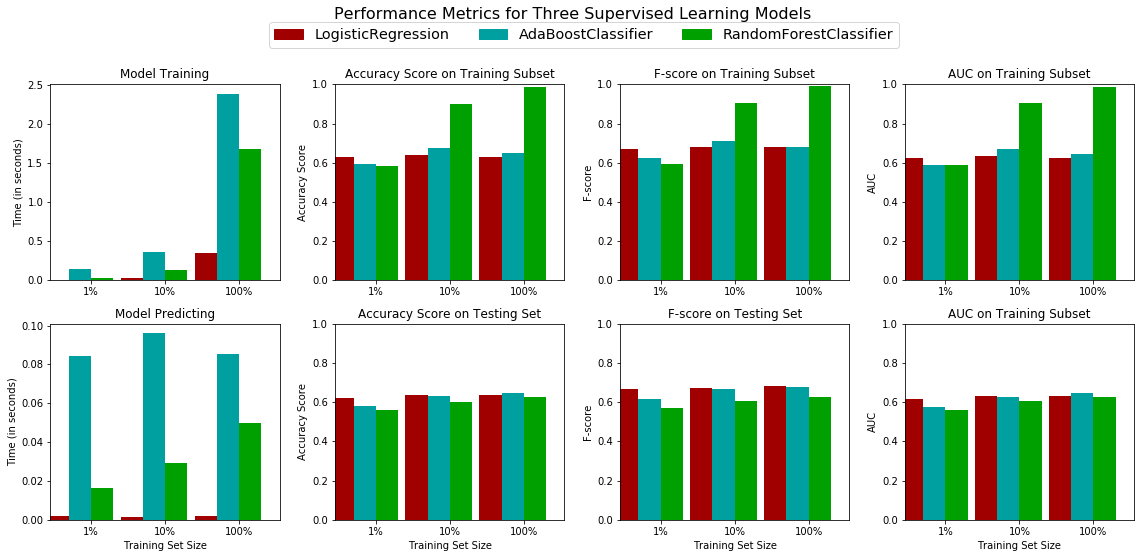

In [184]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt.pdf')

In [185]:
def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
    best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
    print clf.__class__.__name__
    print "Unoptimized model\n------"
    print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
    print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta=1))
    print "AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions))
    print "\nOptimized Model\n------"
    print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
    print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1))
    print "Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions))

    print best_clf

In [203]:
# Do the grid search for hyperparameters
from sklearn.metrics import make_scorer 
from sklearn.grid_search import GridSearchCV
parameters_RF = {"n_estimators": [10,20,50,100,250,500]}
parameters_LR = {"penalty": ['l1','l2'],
              "C": [0.1,0.5,1.,2.,2.5,5]}
parameters_ADA = {"n_estimators": [100,200,300,400],
              "learning_rate": [0.1,0.5,1]}

In [165]:
# Grid search for Adaboost
gridsearch(clf_A,parameters_ADA,X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)

AdaBoostClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6542
F-score on testing data: 0.6832
AUC on testing data: 0.6513

Optimized Model
------
Final accuracy score on the testing data: 0.6567
Final F-score on the testing data: 0.6873
Final AUC on the testing data: 0.6535
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=300, random_state=0)


In [204]:
# Grid search for logistic regression
gridsearch(clf_B,parameters_LR,X_train_LR, y_train_LR, X_test_LR, y_test_LR)

LogisticRegression
Unoptimized model
------
Accuracy score on testing data: 0.6325
F-score on testing data: 0.6757
AUC on testing data: 0.6274

Optimized Model
------
Final accuracy score on the testing data: 0.6381
Final F-score on the testing data: 0.6708
Final AUC on the testing data: 0.6347
LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [5]:
# Grid search for RF
gridsearch(clf_C,parameters_RF,X_train_RF, y_train_RF, X_test_RF, y_test_RF)

NameError: name 'gridsearch' is not defined

AdaBoostClassifier trained on 336 samples.
AdaBoostClassifier with accuracy 0.578310214376, F1 0.590597453477 and AUC 0.578274840659.
AdaBoostClassifier trained on 3369 samples.
AdaBoostClassifier with accuracy 0.644640605296, F1 0.666824308347 and AUC 0.64291748954.
AdaBoostClassifier trained on 33697 samples.
AdaBoostClassifier with accuracy 0.656998738966, F1 0.686491470724 and AUC 0.653910279205.
LogisticRegression trained on 336 samples.
LogisticRegression with accuracy 0.607818411097, F1 0.625391471934 and AUC 0.607000244375.
LogisticRegression trained on 3369 samples.
LogisticRegression with accuracy 0.637831021438, F1 0.670793214122 and AUC 0.634385539944.
LogisticRegression trained on 33697 samples.
LogisticRegression with accuracy 0.633291298865, F1 0.676888888889 and AUC 0.628065208818.
RandomForestClassifier trained on 336 samples.
RandomForestClassifier with accuracy 0.622446406053, F1 0.651617407494 and AUC 0.619794469984.
RandomForestClassifier trained on 3369 samples.
R

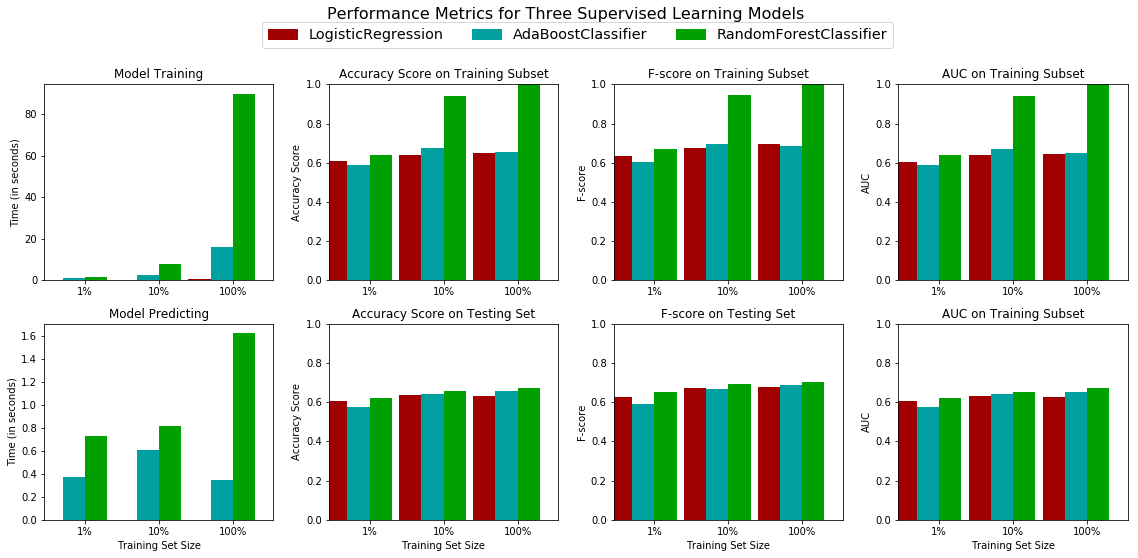

In [198]:
# Run the classifier with refined hyperparameters
clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_opt.pdf')

Training set has 33697 samples.
Testing set has 5947 samples.
AdaBoostClassifier trained on 336 samples.
AdaBoostClassifier with accuracy 0.576929544308, F1 0.608952440162 and AUC 0.574169091996.
AdaBoostClassifier trained on 3369 samples.
AdaBoostClassifier with accuracy 0.632924163444, F1 0.667883766925 and AUC 0.629050289406.
AdaBoostClassifier trained on 33697 samples.
AdaBoostClassifier with accuracy 0.649403060367, F1 0.681825118266 and AUC 0.645762887599.
LogisticRegression trained on 336 samples.
LogisticRegression with accuracy 0.592567681184, F1 0.594341202076 and AUC 0.594103079466.
LogisticRegression trained on 3369 samples.
LogisticRegression with accuracy 0.631410795359, F1 0.676505312869 and AUC 0.625661350453.
LogisticRegression trained on 33697 samples.
LogisticRegression with accuracy 0.641499915924, F1 0.677165354331 and AUC 0.637366005634.
RandomForestClassifier trained on 336 samples.
RandomForestClassifier with accuracy 0.601647889692, F1 0.644347695541 and AUC 0.

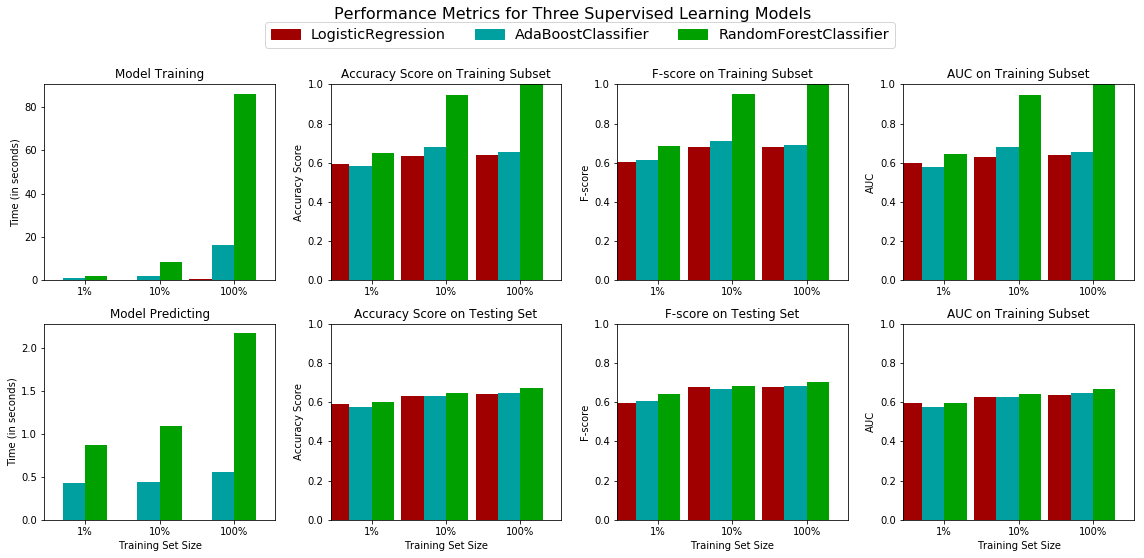

In [194]:
# Run the classifier with diferent training/testing set split ratio
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, popular_label, test_size = 0.15, random_state = 0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, popular_label, test_size = 0.15, random_state = 0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, popular_label, test_size = 0.15, random_state = 0)

print "Training set has {} samples.".format(X_train_ADA.shape[0])
print "Testing set has {} samples.".format(X_test_ADA.shape[0])

samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
clf_B = LogisticRegression(random_state=0, C=2.5)
clf_C = RandomForestClassifier(random_state=0, n_estimators=500)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_opt_test.pdf')

SyntaxError: invalid syntax (<ipython-input-1-a97226be569a>, line 1)